In [2]:
#from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [3]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [4]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


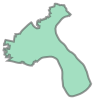

In [5]:
zipcodes.loc[0, 'geometry']

#### ...and printing it


In [6]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.68724897141 36.318212121092, -86.687216475338 36.318210560887, -86.687181702435 36.318208780693, -86.687146962761 36.318206917893, -86.687112187256 36.318205000347, -86.687077445444 36.318202972151, -86.687042702928 36.318200862685, -86.687034690751 36.318200362824, -86.687007959928 36.318198697129, -86.68697325063 36.318196422067, -86.686938539918 36.318194065167, -86.686903827781 36.318191625285, -86.68686914958 36.318189102792, -86.686834437433 36.318186498074, -86.6867997571 36.318183810757, -86.686765111412 36.318181040826, -86.686730430357 36.318178188106, -86.686695782299 36.318175225883, -86.68666116771 36.318172208522, -86.686626552408 36.318169108746, -86.686591935688 36.318165926561, -86.686557318725 36.318162634491, -86.686522735235 36.318159287854, -86.686488151499 36.318155830759, -86.686453600524 36.318152318529, -86.68641904813 36.31814872389, -86.68638449549 36.318145018792, -86.686349976324 36.318141259129, -86.68631549015 36.318137389391, -86.6862

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


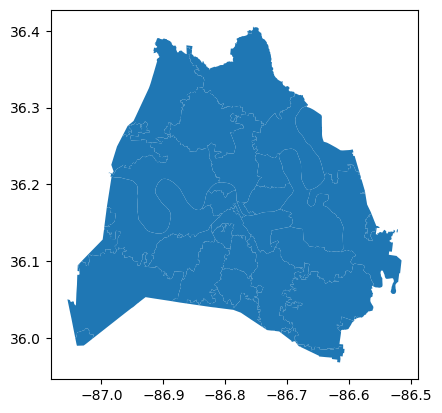

In [7]:
zipcodes.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


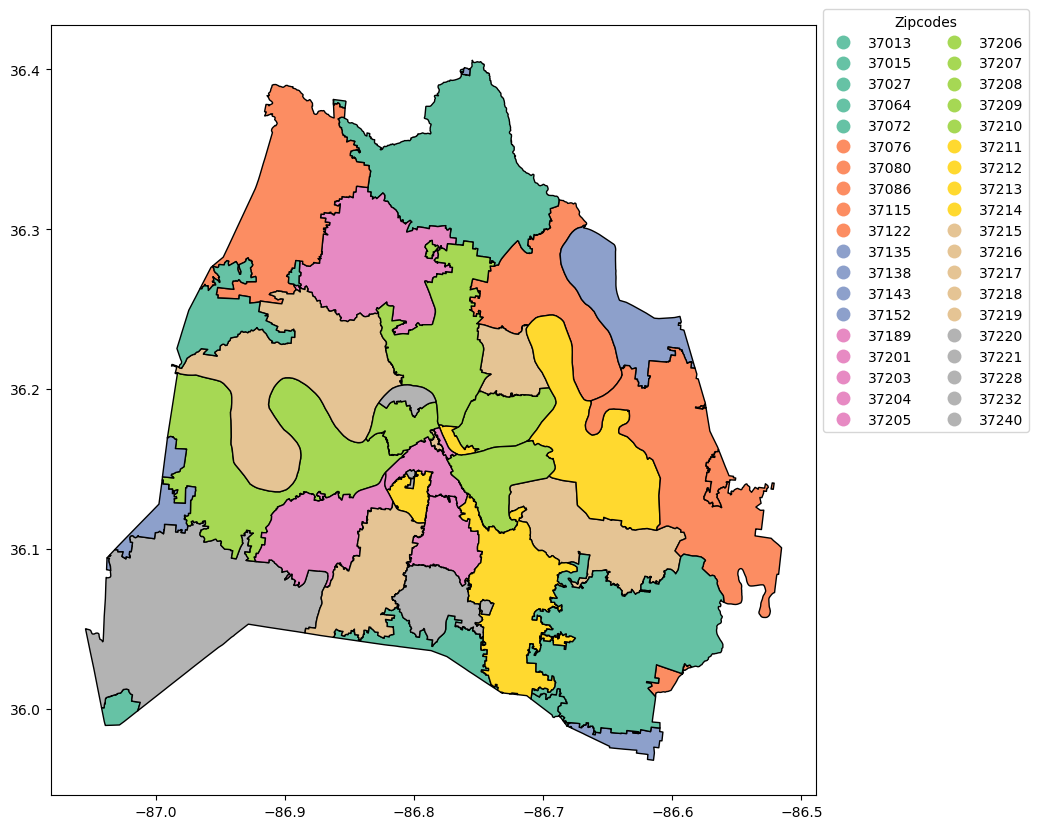

In [8]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

#### Next you will read in the bus stop data
- downloaded from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [9]:
Building_Permits = gpd.read_file('../data/Building_Permit.geojson')
print(Building_Permits.shape)
Building_Permits.head(3)

(6046, 22)


,Permit__,Permit_Type_Description,Permit_Subtype_Description,Parcel,Date_Entered,Date_Issued,Const_Cost,Address,City,State,...,Per_Ty,Per_SubTy,IVR_Trk_,Purpose,Council_Dist,Lon,Lat,ObjectId,ZIP,geometry
0,2023023374,Building Residential - Addition,Single Family Residence,10412024600,"Tue, 11 Apr 2023 05:00:00 GMT",None,0,1916 18TH AVE S,NASHVILLE,TN,...,CARA,CAA01R301,4302991,Addition and outbuilding construction must ...,18,-86.796767,36.134014,1,37212,POINT (-86.79677 36.13401)
1,D2020047607,Building Use & Occupancy,"Accessory Structure, Pools - Residential",11704002200,"Tue, 24 Oct 2023 05:00:00 GMT",None,100000,2509 BELMONT BLVD,NASHVILLE,TN,...,CAUO,CAA14U017,3856896,Proposed 13' x 32' Swimming Pool in rear yard.,18,-86.794539,36.125197,2,37212,POINT (-86.79454 36.12520)
2,D2020068970,Building Residential - Addition,Single Family Residence,06308004200,"Thu, 02 Feb 2023 06:00:00 GMT",None,105,4004 UNIVERSITY AVE,OLD HICKORY,TN,...,CARA,CAA01R301,3891358,"adding a 6' wide by 17.5' deep, single story a...",11,-86.633246,36.228955,3,37138,POINT (-86.63325 36.22896)


In [10]:
Building_Permits.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Permit__                    6046 non-null   object  
 1   Permit_Type_Description     6046 non-null   object  
 2   Permit_Subtype_Description  6046 non-null   object  
 3   Parcel                      6046 non-null   object  
 4   Date_Entered                6046 non-null   object  
 5   Date_Issued                 0 non-null      object  
 6   Const_Cost                  6046 non-null   int64   
 7   Address                     6046 non-null   object  
 8   City                        6046 non-null   object  
 9   State                       6046 non-null   object  
 10  Subdivision_Lot             6045 non-null   object  
 11  Contact                     6046 non-null   object  
 12  Per_Ty                      6046 non-null   object  
 13  Per_SubTy 

- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [11]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

#### Now you are ready to combine bus stops and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the **bus stops within a zip code polygon**
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [12]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [13]:
permits_by_zip = gpd.sjoin(Building_Permits, zipcodes, predicate = 'within')

In [14]:
permits_by_zip.head()

,Permit__,Permit_Type_Description,Permit_Subtype_Description,Parcel,Date_Entered,Date_Issued,Const_Cost,Address,City,State,...,Purpose,Council_Dist,Lon,Lat,ObjectId,ZIP,geometry,index_right,zip,po_name
0,2023023374,Building Residential - Addition,Single Family Residence,10412024600,"Tue, 11 Apr 2023 05:00:00 GMT",None,0,1916 18TH AVE S,NASHVILLE,TN,...,Addition and outbuilding construction must ...,18,-86.796767,36.134014,1,37212,POINT (-86.79677 36.13401),9,37212,NASHVILLE
1,D2020047607,Building Use & Occupancy,"Accessory Structure, Pools - Residential",11704002200,"Tue, 24 Oct 2023 05:00:00 GMT",None,100000,2509 BELMONT BLVD,NASHVILLE,TN,...,Proposed 13' x 32' Swimming Pool in rear yard.,18,-86.794539,36.125197,2,37212,POINT (-86.79454 36.12520),9,37212,NASHVILLE
2,D2020068970,Building Residential - Addition,Single Family Residence,06308004200,"Thu, 02 Feb 2023 06:00:00 GMT",None,105,4004 UNIVERSITY AVE,OLD HICKORY,TN,...,"adding a 6' wide by 17.5' deep, single story a...",11,-86.633246,36.228955,3,37138,POINT (-86.63325 36.22896),22,37138,OLD HICKORY
3,D2020080590,Building Residential - New,Single Family Residence,043060A01600CO,"Mon, 29 Nov 2021 06:00:00 GMT",None,439773,713 ELLIE DR,MADISON,TN,...,"Construct new home on lot 15 of Amqui Place, o...",9,-86.700883,36.274176,4,37115,POINT (-86.70088 36.27418),0,37115,MADISON
4,D2021026275,Building Residential - Addition,Single Family Residence,16109004000,"Fri, 02 Aug 2024 05:00:00 GMT",None,318761,5500 THALMAN DR,BRENTWOOD,TN,...,5500 Thalman Drive,26,-86.749685,36.045886,5,37027,POINT (-86.74968 36.04589),3,37027,BRENTWOOD


#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [15]:
permits_by_zip['zip'].value_counts()

zip
37209    603
37206    489
37203    478
37207    431
37211    420
37218    355
37208    314
37013    295
37215    251
37115    230
37210    220
37216    218
37205    203
37076    202
37204    189
37221    176
37212    175
37214    148
37138    124
37217    115
37072     78
37201     71
37027     66
37220     51
37080     39
37219     26
37189     22
37228     13
37232      8
37135      7
37086      7
37143      6
37122      5
37213      5
37240      4
37015      2
Name: count, dtype: int64

#### Let's take a closer look at the 272 bus stops in the 37207 zip code
- filter the stops_by_zip data to just get bus stops in 37207
- filter the zip code geodataframe to just the polygon (row) for 37207


In [17]:
permits_by_zip_in_37207 = permits_by_zip.loc[permits_by_zip['zip'] == '37207']

In [19]:

permits_by_zip_in_37207 .shape

(431, 25)

In [20]:
polygon37207 = zipcodes.loc[zipcodes['zip'] == '37207']
polygon37207.shape

(2, 3)

#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the bus stops and color them by route

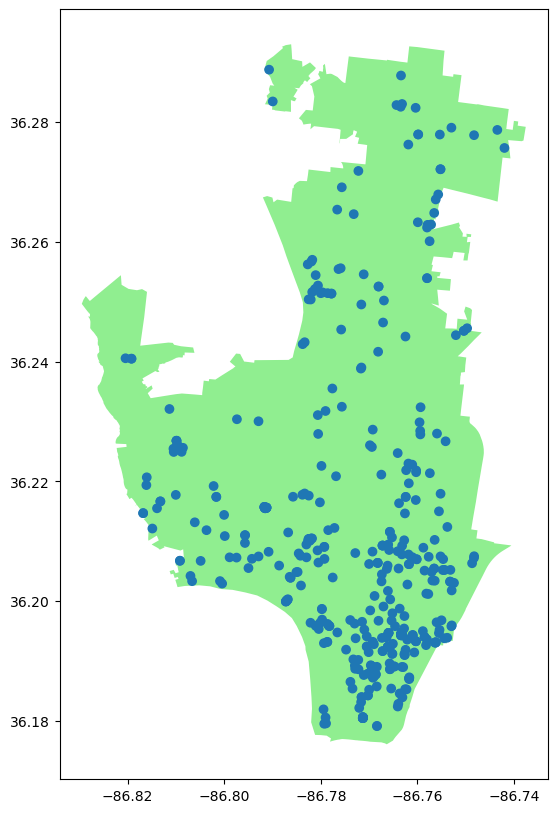

In [23]:
#fig, ax = matplotlib.subplots()
ax = polygon37207.plot(figsize = (8, 10), color = 'lightgreen')
permits_by_zip_in_37207.plot( ax = ax, column = 'zip');
plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [24]:
polygon37207.geometry.centroid

C:\Users\Tiffa\AppData\Local\Temp\ipykernel_7160\3792774199.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37207.geometry.centroid


19    POINT (-86.78726 36.28724)
42    POINT (-86.77677 36.23245)
dtype: geometry

In [26]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37207.geometry.centroid[42]
print(center)

POINT (-86.77676762469858 36.23245257407244)


C:\Users\Tiffa\AppData\Local\Temp\ipykernel_7160\3995710814.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37207.geometry.centroid[42]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [27]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.23245257407244, -86.77676762469858]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [28]:
#create our map of Nashville Zip Code 37207 and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

#### Next, let's add our 37207 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [29]:
i = 0
for row_index, row_values in permits_by_zip_in_37207.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 28
values are:
 
Permit__                                                            D2023073148
Permit_Type_Description                            Building Residential - Rehab
Permit_Subtype_Description                              Single Family Residence
Parcel                                                              08208000300
Date_Entered                                      Wed, 27 Sep 2023 05:00:00 GMT
Date_Issued                                                                None
Const_Cost                                                                 7272
Address                                                            816 N 6TH ST
City                                                                  NASHVILLE
State                                                                        TN
Subdivision_Lot                                 LOT 52 J B HAYNIES MILLERS ADDN
Contact                                                    MLS CONSTRUCTION LLC
Per_Ty        

#### Create map_37207 again with additional features:
- add the zipcode area outline (polygon_37207)
- iterate through the stops_in_37207 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37207`
- display `map_37207`

In [34]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in permits_by_zip_in_37207.iterrows():
    loc = [row_values['Lat'], row_values['Lon']]
    pop = str(row_values['zip'])
    icon=folium.Icon(color="black",icon="building", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
map_37207.save('../maps/map37207.html')

#display our map
map_37207

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [35]:
folium.Map?

Init signature:
folium.Map(
    location=None,
    width='100%',
    height='100%',
    left='0%',
    top='0%',
    position='relative',
    tiles='OpenStreetMap',
    attr=None,
    min_zoom=0,
    max_zoom=18,
    zoom_start=10,
    min_lat=-90,
    max_lat=90,
    min_lon=-180,
    max_lon=180,
    max_bounds=False,
    crs='EPSG3857',
    control_scale=False,
    prefer_canvas=False,
    no_touch=False,
    disable_3d=False,
    png_enabled=False,
    zoom_control=True,
    **kwargs,
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, Toner, and Watercolor)
    - "Cloudmade" (Must pass API key)
    - "Mapb

In [36]:
cluster_map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37207)

folium.GeoJson(polygon37207).add_to(cluster_map_37207)

# inside the loop add each marker to the cluster
for row_index, row_values in permits_by_zip_in_37207.iterrows():
    loc = [row_values['Lat'], row_values['Lon']]
    pop = str(row_values['zip'])
    icon=folium.Icon(color="black",icon="building", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37207.save('../maps/cluster37207.html')

cluster_map_37207  

In [37]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#create a list of locations and pass them to FastMarkerCluster()
locations = permits_by_zip_in_37207[['Lat', 'Lon']].values.tolist()
map_37207.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37207